In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

In [2]:
labels_df = pd.read_csv("labels/labels_reduced.csv", index_col=0)
features_df = pd.read_csv("features/features.csv")

# Features in Dataframe
columns_all = features_df.columns[3:-1].to_list()  # ALL FEATURES, exclude file names and bond volume fractions
feature_weights = features_df[features_df.columns[-1]].to_numpy()
# The structures for each row in features_df
feature_phase_ids = features_df['structure_name'].astype(str).str.split('_super').str[0].to_list()  

In [3]:
features_df.head()

,Unnamed: 0,structure_name,structure_path,site Number_atom1,site Number_atom2,site AtomicWeight_diff,site AtomicWeight_atom1,site AtomicWeight_atom2,site Row_atom1,site Row_atom2,...,G4_0.005_1.0_1.0_atom2,G4_0.005_1.0_-1.0_atom1,G4_0.005_1.0_-1.0_atom2,G4_0.005_4.0_1.0_atom1,G4_0.005_4.0_1.0_atom2,G4_0.005_4.0_-1.0_atom1,G4_0.005_4.0_-1.0_atom2,coordination_number,bond_length,volume_fraction
0,10004_super.cif_Atom0_Bond0,10004_super.cif,supercells_data,62.0,8.0,134.3606,150.36,15.9994,6.0,2.0,...,7.729945,2.356312,2.636161,3.98593,4.035540,0.183682,0.274427,8,2.348969,0.018402
1,10004_super.cif_Atom0_Bond1,10004_super.cif,supercells_data,62.0,8.0,134.3606,150.36,15.9994,6.0,2.0,...,7.753143,2.356312,2.747697,3.98593,4.025568,0.183682,0.348856,8,2.322674,0.018196
2,10004_super.cif_Atom0_Bond2,10004_super.cif,supercells_data,62.0,8.0,134.3606,150.36,15.9994,6.0,2.0,...,7.729945,2.356312,2.636161,3.98593,4.035540,0.183682,0.274427,8,2.348969,0.018402
3,10004_super.cif_Atom0_Bond3,10004_super.cif,supercells_data,62.0,8.0,134.3606,150.36,15.9994,6.0,2.0,...,7.729945,2.356312,2.636161,3.98593,4.035540,0.183682,0.274427,8,2.581681,0.020225
4,10004_super.cif_Atom0_Bond4,10004_super.cif,supercells_data,62.0,8.0,134.3606,150.36,15.9994,6.0,2.0,...,7.729945,2.356312,2.636161,3.98593,4.035540,0.183682,0.274427,8,2.580842,0.020218


In [4]:
features_df.tail()

,Unnamed: 0,structure_name,structure_path,site Number_atom1,site Number_atom2,site AtomicWeight_diff,site AtomicWeight_atom1,site AtomicWeight_atom2,site Row_atom1,site Row_atom2,...,G4_0.005_1.0_1.0_atom2,G4_0.005_1.0_-1.0_atom1,G4_0.005_1.0_-1.0_atom2,G4_0.005_4.0_1.0_atom1,G4_0.005_4.0_1.0_atom2,G4_0.005_4.0_-1.0_atom1,G4_0.005_4.0_-1.0_atom2,coordination_number,bond_length,volume_fraction
819015,99920_super.cif_Atom744_Bond3392,99920_super.cif,supercells_data,8.0,8.0,0.0,15.9994,15.9994,2.0,2.0,...,8.201583,2.780846,2.842531,4.215236,4.414073,0.362842,0.364974,10,2.5739,0.000319
819016,99920_super.cif_Atom745_Bond3393,99920_super.cif,supercells_data,8.0,8.0,0.0,15.9994,15.9994,2.0,2.0,...,8.201583,2.842531,2.842531,4.414073,4.414073,0.364974,0.364974,10,2.5739,0.000319
819017,99920_super.cif_Atom745_Bond3394,99920_super.cif,supercells_data,8.0,8.0,0.0,15.9994,15.9994,2.0,2.0,...,8.201583,2.836229,2.842531,4.394157,4.414073,0.364881,0.364974,10,2.5739,0.000319
819018,99920_super.cif_Atom746_Bond3395,99920_super.cif,supercells_data,8.0,8.0,0.0,15.9994,15.9994,2.0,2.0,...,8.201583,2.780846,2.842531,4.215236,4.414073,0.362842,0.364974,10,2.5739,0.000319
819019,99920_super.cif_Atom747_Bond3396,99920_super.cif,supercells_data,8.0,8.0,0.0,15.9994,15.9994,2.0,2.0,...,7.888150,2.836229,2.780846,4.394157,4.215236,0.364881,0.362842,10,2.5739,0.000319


## Average features for each structure by bond volume fraction

In [5]:
# Make each structure described by weighted average 
features_dict = dict()
d = len(columns_all)  # Number of features considered
i = 0
for idx in features_df.index:
    if feature_phase_ids[i] not in features_dict.keys():     
        features_dict[feature_phase_ids[i]] = np.zeros(d)
    # For feature selection, each feature is a weighted sum of its constituent bond features
    features_dict[feature_phase_ids[i]] = features_dict[feature_phase_ids[i]] + features_df.loc[idx, columns_all].to_numpy()*feature_weights[i]
    i += 1


## Copy over features for each label

In [6]:
# Copy over labels to each bond (just for correlation)
y = list()
temps = list()
combined_data = dict()
labels_skipped = 0
i = 0
for idx in labels_df.index:
    phase = str(int(labels_df.loc[idx, 'phase_id']))
    if phase in features_dict.keys():
        combined_data[idx] = features_dict[phase]
        y.append( labels_df.loc[idx, "thermal_expansion"] )
        temps.append( labels_df.loc[idx, "temperature"] )
    else:
        print("Phases ", phase, " not found in structures")
        labels_skipped += 1
    i += 1

print("Total Number of Labels: ", len(labels_df))
print("Labels Skipped Total: ", labels_skipped)
# New dataframe with features and labels
combined_df = pd.DataFrame.from_dict(combined_data, orient='index', columns=columns_all)
combined_df['temperature'] = temps
combined_df['thermal_expansion'] = y

Phases  13996  not found in structures
Phases  131156  not found in structures
Phases  130566  not found in structures
Phases  130566  not found in structures
Phases  71777  not found in structures
Phases  71777  not found in structures
Phases  71776  not found in structures
Phases  71776  not found in structures
Phases  142888  not found in structures
Phases  127780  not found in structures
Phases  122321  not found in structures
Phases  122321  not found in structures
Phases  59916  not found in structures
Phases  9782  not found in structures
Phases  12354  not found in structures
Phases  70111  not found in structures
Phases  70110  not found in structures
Phases  70180  not found in structures
Phases  70109  not found in structures
Phases  70109  not found in structures
Phases  77642  not found in structures
Phases  128280  not found in structures
Phases  70179  not found in structures
Phases  15966  not found in structures
Phases  15966  not found in structures
Phases  15933  not

## Find Correlation Coefficients for Features

In [7]:
select_columns = ["site AtomicWeight_atom1",  "site Electronegativity_diff", "site CovalentRadius_atom1", "AGNI eta=8.00e-01_atom1", "AGNI eta=6.80e+00_atom2", "G2_0.05_atom1", "coordination_number", "bond_length", "temperature"]

## Generate Heat Map for Correlation Matrix ##
select_columns.append("thermal_expansion")

## List correlation with TEC for all features
for i in range(len(columns_all)):
    print(columns_all[i])
    print(np.corrcoef(combined_df[[columns_all[i], 'thermal_expansion']].to_numpy().T)[0][1] )


site Number_atom1
0.00261630377515717
site Number_atom2
-0.002842373270709958
site AtomicWeight_diff
0.0022352104798245673
site AtomicWeight_atom1
0.0019541337150450477
site AtomicWeight_atom2
-0.002273937284530257
site Row_atom1
-0.0012182912760823593
site Row_atom2
-0.004580116431065086
site Column_atom1
-0.0038612344229581397
site Column_atom2
-0.006191079658796224
site Electronegativity_diff
-0.004052932150408587
site Electronegativity_atom1
-0.011187502270890215
site Electronegativity_atom2
-0.005901240691634163
site CovalentRadius_atom1
-0.010710914136076333
site CovalentRadius_atom2
-0.0026373583313268607
AGNI eta=8.00e-01_atom1
-0.015014873121398126
AGNI eta=8.00e-01_atom2
-0.0026302937127904605
AGNI eta=1.23e+00_atom1
-0.02013339294197471
AGNI eta=1.23e+00_atom2
-0.020592953881445955
AGNI eta=1.88e+00_atom1
-0.019496669572924882
AGNI eta=1.88e+00_atom2
-0.0275973214094384
AGNI eta=2.89e+00_atom1
-0.02144580739786249
AGNI eta=2.89e+00_atom2
-0.02506861748984455
AGNI eta=4.43e+0

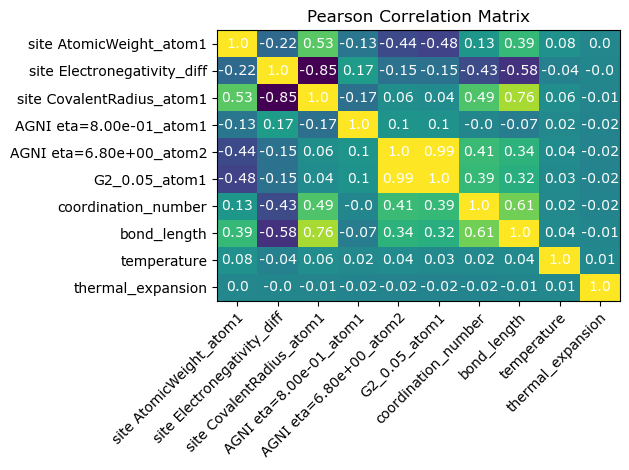

In [11]:
# Pearson for Selected Labels
pearson = np.corrcoef(combined_df[select_columns].to_numpy().T)
fig, ax = plt.subplots()
im = ax.imshow(pearson, aspect='auto')
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(select_columns)), labels=select_columns)
ax.set_yticks(np.arange(len(select_columns)), labels=select_columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for i in range(len(select_columns)):
    for j in range(len(select_columns)):
        text = ax.text(j, i, np.round(100*pearson[i, j])/100,
                       ha="center", va="center", color="w")
ax.set_title("Pearson Correlation Matrix")
fig.tight_layout()
plt.savefig("figs/"+"pearson.png")
plt.show()


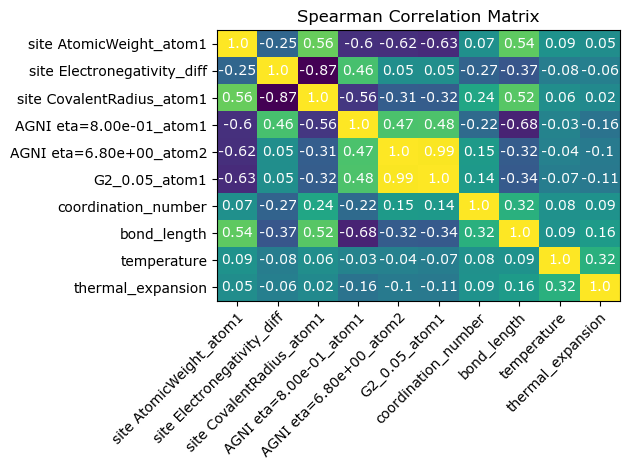

In [17]:
# Spearman for Selected Labels
spearman = scipy.stats.spearmanr(combined_df[select_columns].to_numpy()).statistic
fig, ax = plt.subplots()
im = ax.imshow(spearman, aspect='auto')
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(select_columns)), labels=select_columns)
ax.set_yticks(np.arange(len(select_columns)), labels=select_columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for i in range(len(select_columns)):
    for j in range(len(select_columns)):
        text = ax.text(j, i, np.round(100*spearman[i, j])/100,
                       ha="center", va="center", color="w")

ax.set_title("Spearman Correlation Matrix")
fig.tight_layout()
plt.savefig("figs/"+"spearman.png")
plt.show()


## Violin Plots of Different Features

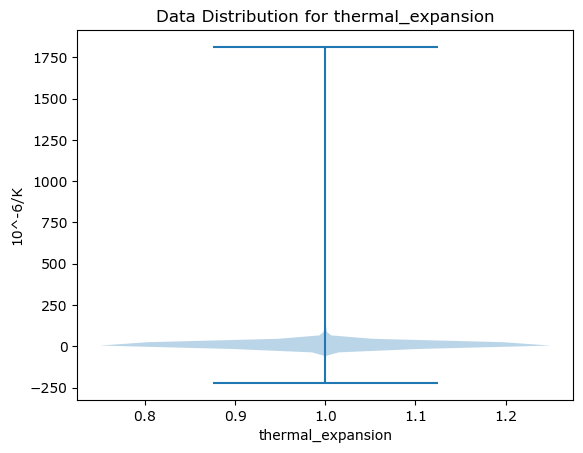

<Figure size 640x480 with 0 Axes>

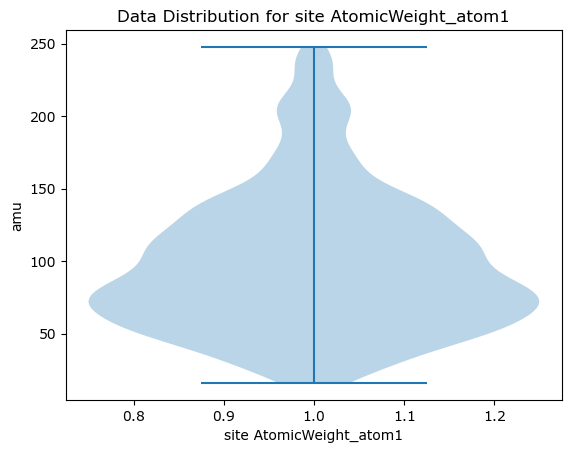

<Figure size 640x480 with 0 Axes>

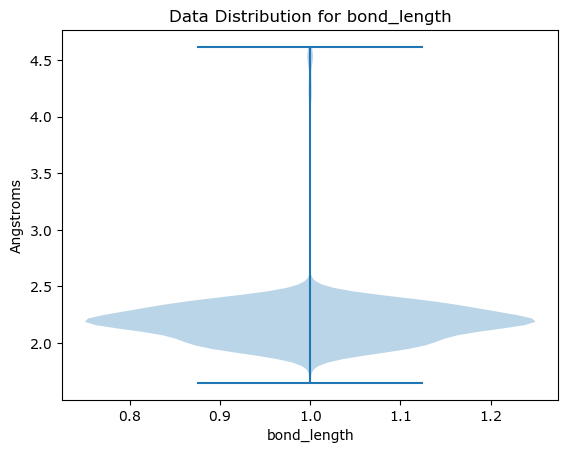

<Figure size 640x480 with 0 Axes>

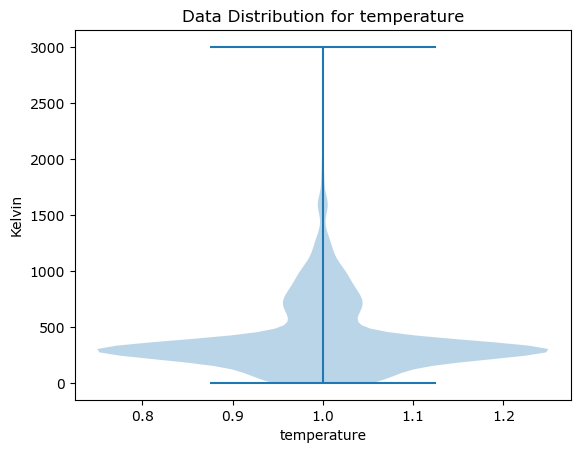

<Figure size 640x480 with 0 Axes>

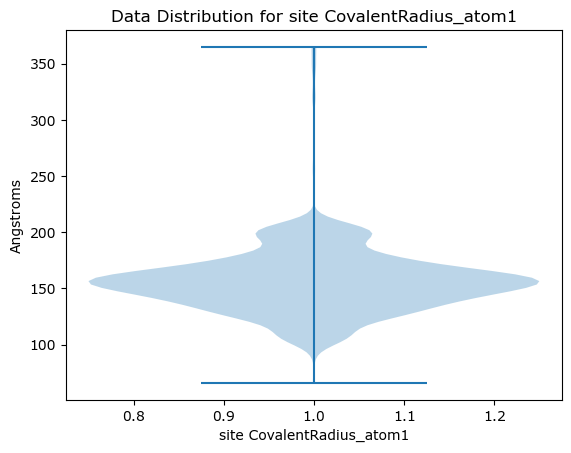

<Figure size 640x480 with 0 Axes>

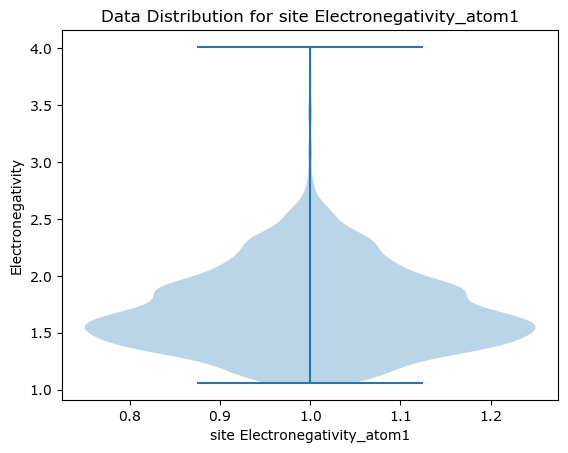

<Figure size 640x480 with 0 Axes>

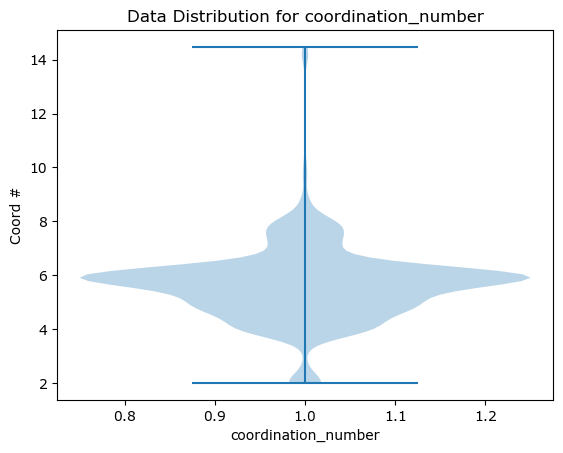

<Figure size 640x480 with 0 Axes>

In [15]:
# Variables of Interst
variables = ['thermal_expansion', 'site AtomicWeight_atom1', 'bond_length', 'temperature', 'site CovalentRadius_atom1', 'site Electronegativity_atom1', 'coordination_number']
units = ['10^-6/K', 'amu', 'Angstroms', 'Kelvin', 'picometers', 'Electronegativity', 'Coord #']

for v, u in zip(variables, units):
    fig, axes = plt.subplots()
    axes.violinplot(dataset = combined_df[v].to_numpy() )
    axes.set_title('Data Distribution for {}'.format(v))
    axes.set_ylabel(u)
    axes.set_xlabel(v)
    plt.show()
    plt.savefig("figs/"+v+"_violin.png")

## List Common Elements and Space Groups

## Violin Plots of TECs and for different subgroups